Импортирую Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median
import seaborn as sns

In [2]:
sAn = pd.read_csv( "archive/anime.csv" )
sRa = pd.read_csv( "archive/rating.csv" )

In [3]:
sAn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Создаю гистограмму рейтинга по 10-ти бальной шкале:

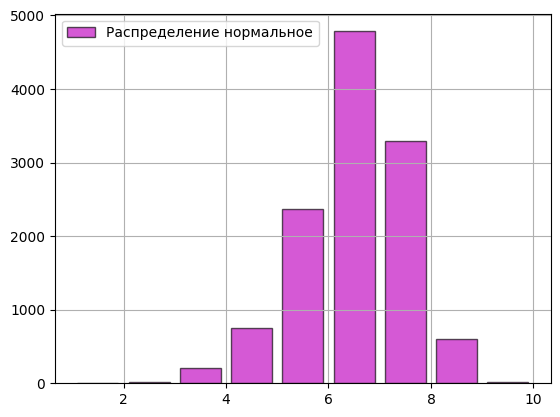

In [4]:
x = sAn.rating

plt.hist(x, bins = np.arange(1,11), rwidth = 0.8, edgecolor = "k", facecolor="m", alpha = 0.65, label="Распределение нормальное")
plt.legend()
plt.grid(which="major")
plt.show()

Делал на основе данных в конце 1-го пунка этой статьи:

https://translated.turbopages.org/proxy_u/en-ru.ru.c1dbe903-642830f2-1b1f9515-74722d776562/https/www.projectpro.io/recipes/make-boxplot-and-interpret-it

Создаю боксплот с теми же данными:

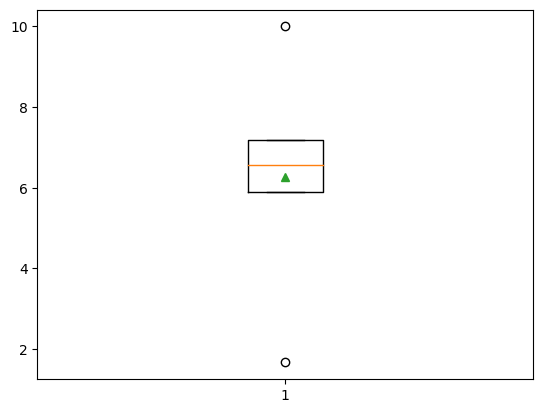

In [5]:
x1 = sAn.rating
xMin = min(x1)
xMax = max(x1)
xMedian = x1.median()
x25 = []
x75 = []
for i in x1: 
    if i>=xMin and i<= xMedian: x25.append(i)
Q25 = median(x25)
for i in x1: 
    if (i>=xMedian and i<=xMax ): x75.append(i)
Q75 = median(x75)
data = [xMin, Q25, xMedian, Q75, xMax]
plt.boxplot(data, showmeans=True)
plt.show()

Также чуть более ёмкий способ расчёта Q25

In [6]:
x1 = sAn.rating
Q25 = x1.quantile(0.25)
Q25

5.88

Параметр showmeans показывает среднее арифметическое

Боксплот - это диаграмма, которая показывает, как распределяются значения переменной. Он также известен как график усов, и он дает нам информацию об изменчивости и дисперсии данных с использованием сводки из пяти чисел. К ним относятся минимум, первый квартиль (Q1), медиана, третий квартиль (Q3) и максимум.
Прямоугольник показывает значения от Q1 до Q3 (x25Mean и x75Mean соответственно), где Q1 - это число между наименьшим числом и медианой набора данных, а Q3 - это число между наибольшим числом и медианой набора данных

"Правка"
Построю диаграмму рассеивания, в качестве непрерывных значений возьму рейтинг и сообщения (так как их количество изменяется в течение определённого интервала времени), корреляция представлена набором данных sAn:

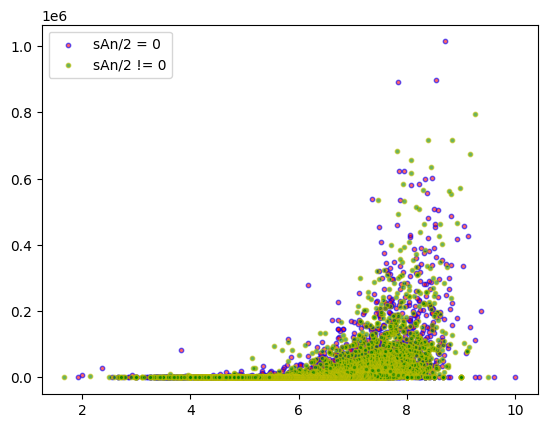

In [7]:
x1 = (sAn.iloc[lambda x: x.index % 2 == 0, 5])
y1 = (sAn.iloc[lambda x: x.index % 2 == 0, 6])

x2 = (sAn.iloc[lambda x: x.index % 2 != 0, 5])
y2 = (sAn.iloc[lambda x: x.index % 2 != 0, 6])


plt.scatter(x1, y1, 10, facecolor = "r", edgecolor = "b", alpha = 0.6, label = "sAn/2 = 0")
plt.scatter(x2, y2, 10, facecolor = "g", edgecolor = "y", alpha = 0.6, label = "sAn/2 != 0")

plt.legend()

plt.show()

Исходя из полученного результата, можно сделать вывод, что в наборе данных sRa потенциально непрерывный ретинг округлён до целого значения.

Гистограмма соотношений рейтингов:

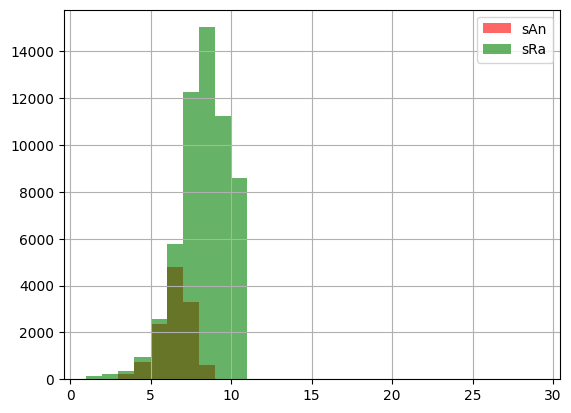

In [8]:
x1 = sAn.rating
x2 = sRa.iloc[lambda x: x.index % 111 == 0, 2]
plt.hist(x1, bins = np.arange(1,30), facecolor="r", alpha = 0.6, label="sAn")
plt.hist(x2, bins = np.arange(1,30), facecolor="g", alpha = 0.6, label="sRa")
plt.legend()
plt.grid(which="major")
plt.show()

Матрица корреляций:

<Axes: >

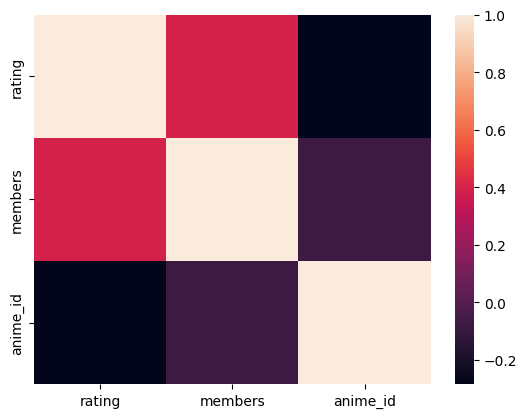

In [9]:
sns.heatmap(sAn[["rating","members", "anime_id"]].corr())

Также для матрицы корреляций можно было не указывать конкретные числовые столбцы, тк функция не работает с иными данными и автоматически опускает их, но при этом выводит сообщение об этом.

Выберу в качестве непрерывной переменной - Рейтинг, а в качестве категориальной - жанр

Гистограмма Y (рейтинг) относительно переменной X (жанра):

Мы проходимся по жанру, соотносим с каждым из них среднюю оценку и строим на этом основании гистограмму (3265 сочетаний жанров)

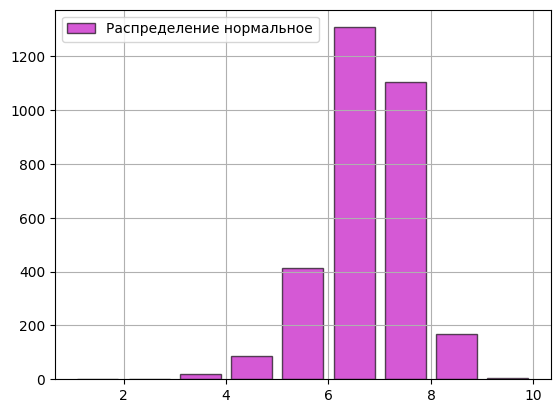

In [10]:
x = sAn.genre
y = sAn.rating
xy = sAn[['genre','rating']]
data = []
sh = x.value_counts()
for i in x.unique():
    num = 0
    buff = 0
    buffArr=[]
    buffArr = x.isin([i])
    kek = 0
    for j in buffArr:
        if j == True:
            buff+=y.loc[kek]
            num+=1
        kek+=1
    data.append(buff/num)
    
plt.hist(data, bins = np.arange(1,11), rwidth = 0.8, edgecolor = "k", facecolor="m", alpha = 0.65, label="Распределение нормальное")
plt.legend()
plt.grid(which="major")
plt.show()

Диаграмма размаха (boxplot) относительно переменной X (жанра):

unique genres count 82


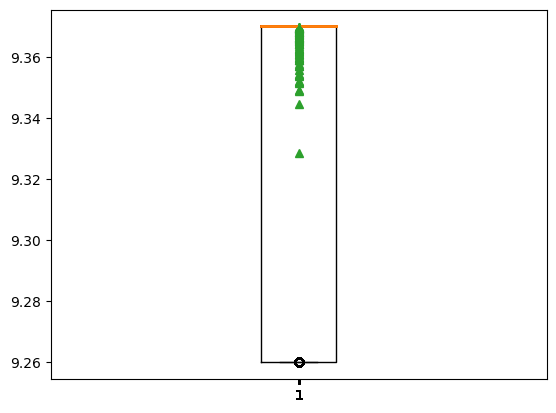

In [11]:
arrayGenreTypes = sAn.genre.unique()
uniqueGenreTypes = set()

for i in arrayGenreTypes:
    if type(i) is float: continue
    else:
        for genre in i.split(','):
            uniqueGenreTypes.add(genre)

print('unique genres count', len(uniqueGenreTypes))
for genre in uniqueGenreTypes:
    sAn[genre] = [int(item) if not pd.isna(item) else 0 for item in sAn.genre.str.contains(genre, na=0)]
    plt.boxplot(sAn.rating[sAn[genre]].dropna(), showmeans = True)  # ни одного nan
#print("sAn[genre].isin([Fantasy]) - ", sAn[genre].isin(["Fantasy"]))

"Правка" Вывод 6-ти боксплотов по рейтингу. Также в следующем фрагменте кода, где я неправильно рассчитывал боксплоты, смог исправить их отрисовку. 

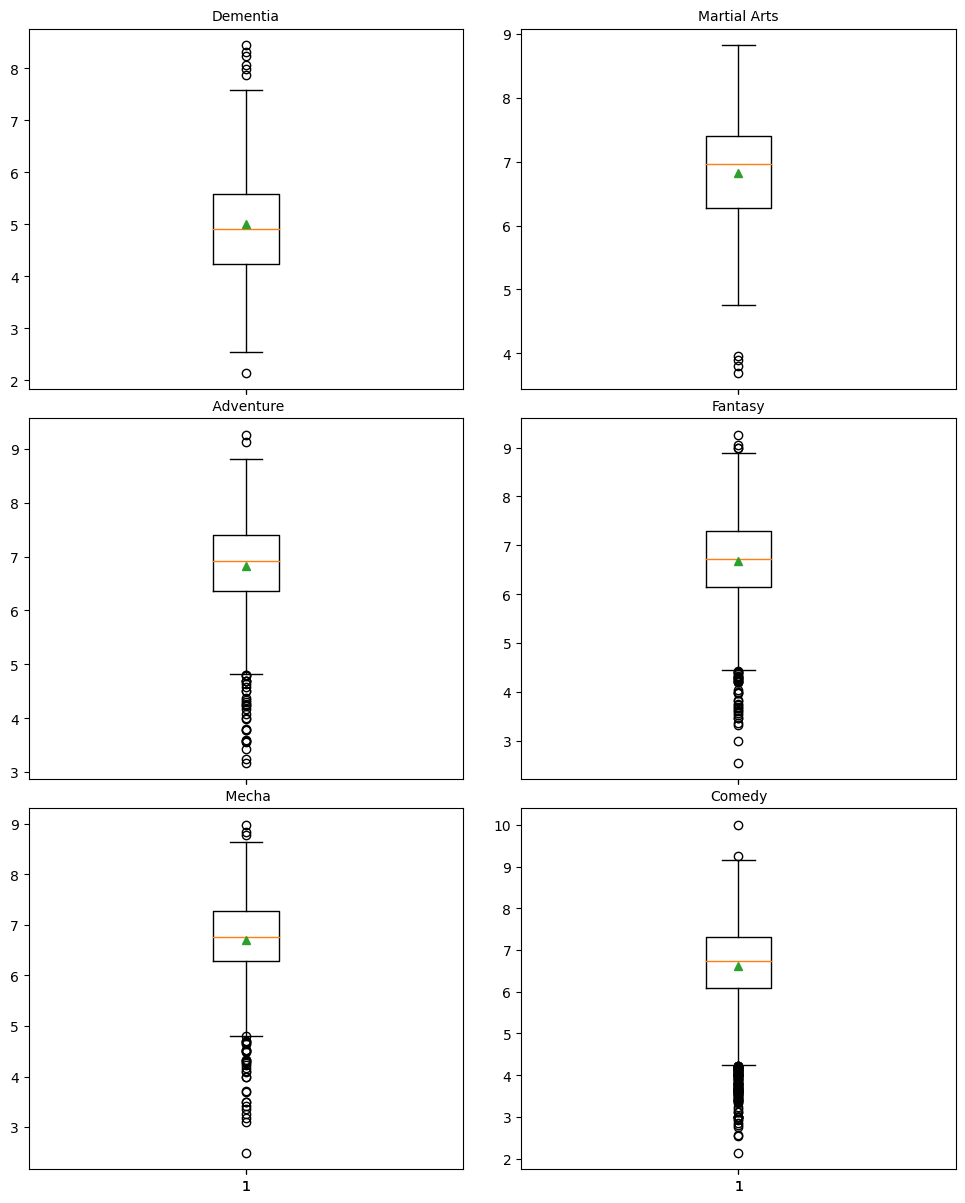

In [12]:
arrayGenreTypes = sAn.genre.unique()
uniqueGenreTypes = set()

for i in arrayGenreTypes:
    if type(i) is float: continue
    else:
        for genre in i.split(','):
            uniqueGenreTypes.add(genre)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex='col')
fig. tight_layout ()
numPltR = 0
numPltC = 0            
            
for genre in list(uniqueGenreTypes)[:6]:
    rating=sAn[sAn[genre]==1].rating.dropna()
    
    axs[numPltR,numPltC].boxplot(rating, showmeans=True)
    axs[numPltR,numPltC].set_title(genre, fontsize=10)
    if numPltR == 2: 
        numPltR = -1
        numPltC += 1
    numPltR += 1

"Правка" Вывод всех диаграмм в исправном виде 

unique genres count 82


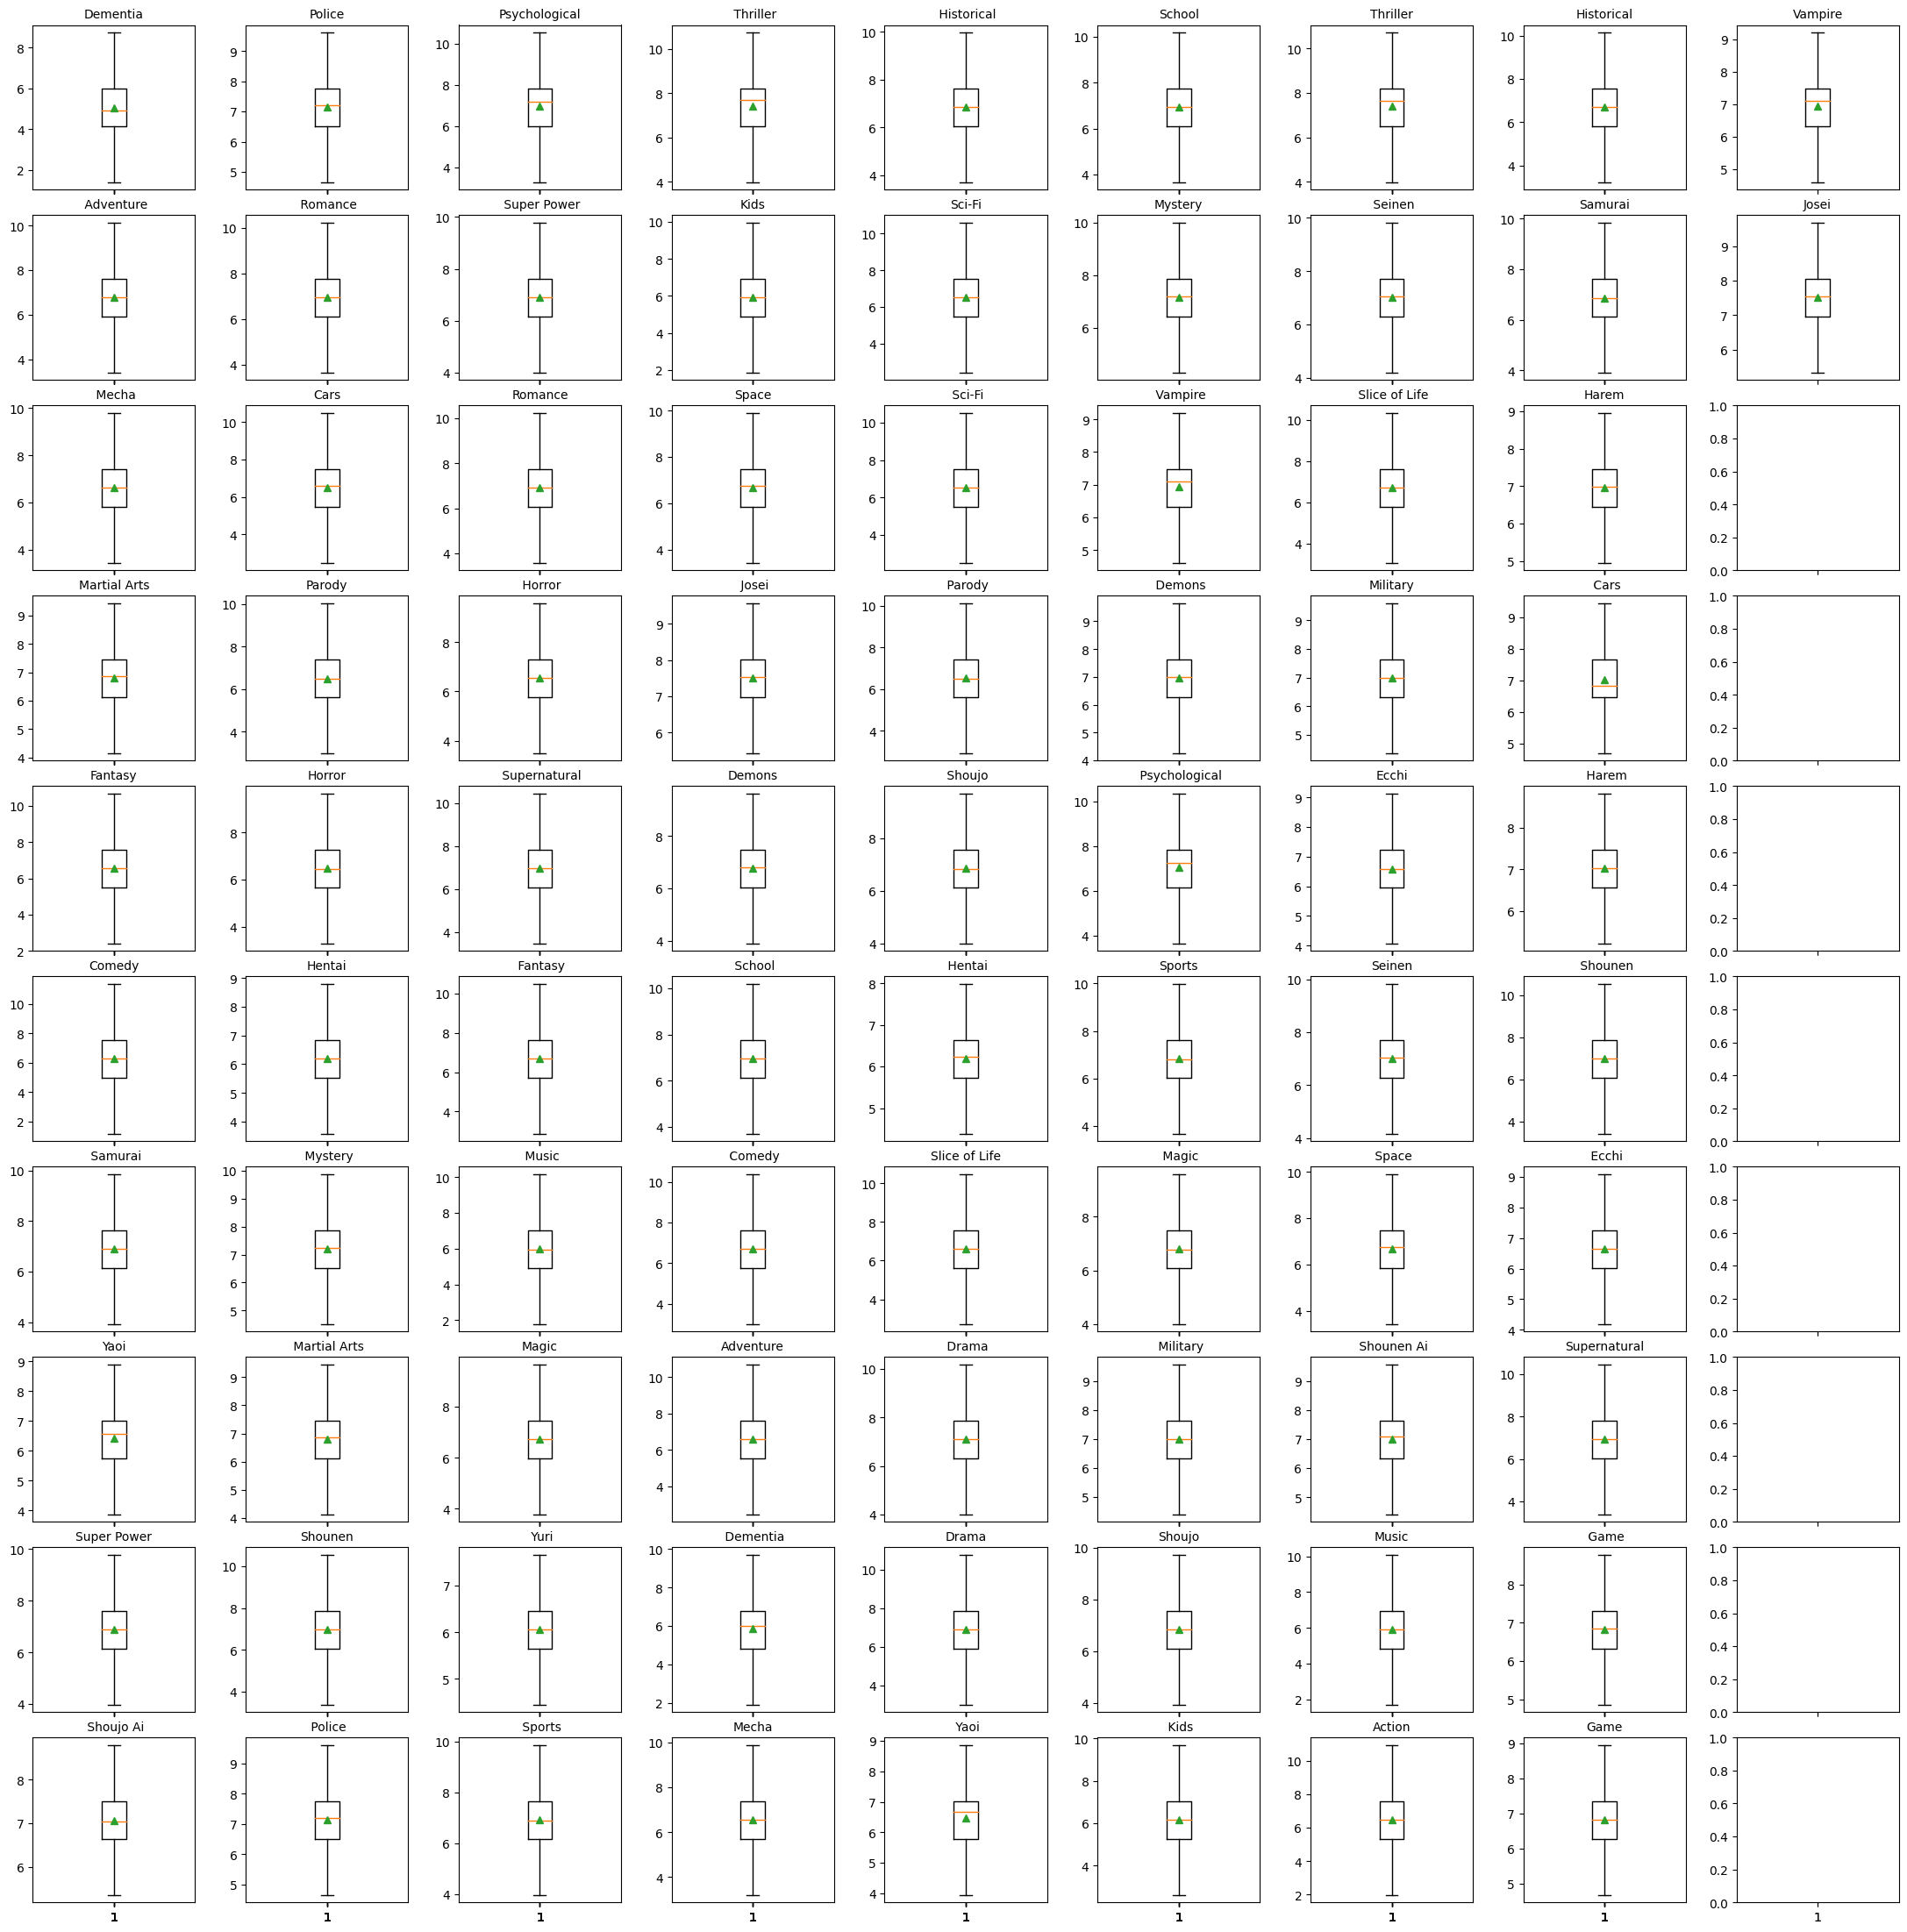

In [13]:
arrayGenreTypes = sAn.genre.unique()
uniqueGenreTypes = set()

for i in arrayGenreTypes:
    if type(i) is float: continue
    else:
        for genre in i.split(','):
            uniqueGenreTypes.add(genre)

print('unique genres count', len(uniqueGenreTypes))
for genre in uniqueGenreTypes:
    sAn[genre] = [int(item) if not pd.isna(item) else 0 for item in sAn.genre.str.contains(genre, na=0)]

fig, axs = plt.subplots(nrows=10, ncols=9, figsize=(22, 22), sharex='col')
fig. tight_layout ()
numPltR = 0
numPltC = 0

sAnRat = sAn.rating.dropna()  # ни одного nan

for genre in uniqueGenreTypes:
    num = 0
    uniqueGenreRating = set()
    cleanGenre = sAn.genre.str.contains(genre, na=0).dropna()  # ни одного nan
    for item in cleanGenre:
        if item: 
            #print("TYPE - ",type(sAn.rating[num]), " - ",sAn.rating[num])
            try:
                uniqueGenreRating.add(sAnRat[num])
            except KeyError:
                continue
        num+=1
    
    
    xMedian = median(uniqueGenreRating)
    Q1 = pd.DataFrame(uniqueGenreRating).quantile(0.25).min() # min чтобы быстро вытащить единственное число, по сути фича
    Q3 = pd.DataFrame(uniqueGenreRating).quantile(0.75).min()
    IQR = Q3 - Q1
    xMin = Q1-1.5*IQR
    xMax = Q3+1.5*IQR
    dt = [xMin, Q1, xMedian, Q3, xMax]
    #print(genre," data is ",dt,"\n")  # Результирующие данные, на основе которых строится boxplot
    #sns.boxplot(data=pd.DataFrame(dt), x="rating", y="genre", hue="deck", dodge=False)
    #plt.boxplot(dt, showmeans=True)
    axs[numPltR,numPltC].boxplot(dt, showmeans=True)
    axs[numPltR,numPltC].set_title(genre, fontsize=10)
    if numPltR == 9: 
        numPltR = -1
        numPltC += 1

    numPltR += 1
    #print("\n",genre,"\n",uniqueGenreRating,"\n")  # Данные по рейтингу для каждого жанра
    

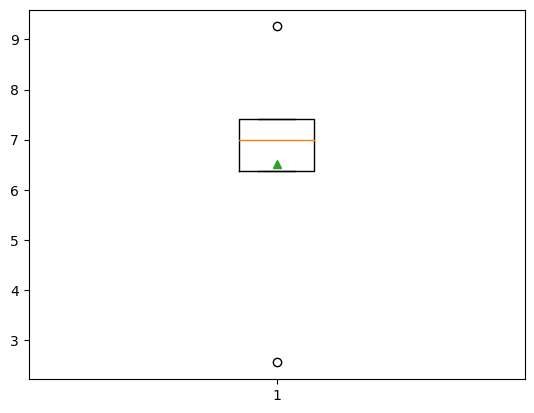

In [14]:
x = sAn.genre
y = sAn.rating
xy = sAn[['genre','rating']]
data = []
sh = x.value_counts()
for i in x.unique():
    num = 0
    buff = 0
    buffArr=[]
    buffArr = x.isin([i])
    kek = 0
    for j in buffArr:
        
        if j == True:
            buff+=y.loc[kek]
            num+=1
        kek+=1
    data.append(buff/num)
    
x1 = data
xMin = min(x1)
xMax = max(x1)
xMedian = median(x1)
x25 = []
x75 = []
for i in x1: 
    if i>=xMin and i<= xMedian: x25.append(i)
Q25 = median(x25)
for i in x1: 
    if (i>=xMedian and i<=xMax ): x75.append(i)
Q75 = median(x75)
data = [xMin, Q25, xMedian, Q75, xMax]
plt.boxplot(data, showmeans=True)
plt.show()

Столбчатая диаграмма относительно переменной X (жанра):

(array([  1.,   0.,   0.,   0.,   3.,   1.,   1.,   7.,   3.,   2.,   9.,
          6.,  13.,   9.,   9.,  19.,  23.,  19.,  38.,  39.,  67.,  69.,
         82.,  85., 119., 151., 183., 211., 210., 234., 191., 215., 237.,
        187., 157., 124., 114.,  85.,  58.,  48.,  25.,  25.,  13.,   7.,
          2.,   2.,   1.]),
 array([2.55      , 2.69276596, 2.83553191, 2.97829787, 3.12106383,
        3.26382979, 3.40659574, 3.5493617 , 3.69212766, 3.83489362,
        3.97765957, 4.12042553, 4.26319149, 4.40595745, 4.5487234 ,
        4.69148936, 4.83425532, 4.97702128, 5.11978723, 5.26255319,
        5.40531915, 5.54808511, 5.69085106, 5.83361702, 5.97638298,
        6.11914894, 6.26191489, 6.40468085, 6.54744681, 6.69021277,
        6.83297872, 6.97574468, 7.11851064, 7.2612766 , 7.40404255,
        7.54680851, 7.68957447, 7.83234043, 7.97510638, 8.11787234,
        8.2606383 , 8.40340426, 8.54617021, 8.68893617, 8.83170213,
        8.97446809, 9.11723404, 9.26      ]),
 <BarContainer obj

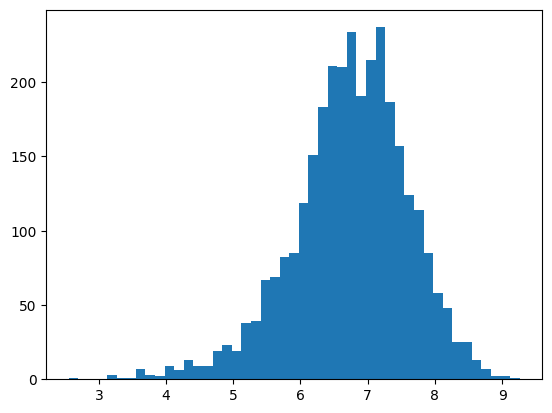

In [15]:
x = sAn.genre
y = sAn.rating
xy = sAn[['genre','rating']]
data = []
sh = x.value_counts()
for i in x.unique():
    num = 0
    buff = 0
    buffArr=[]
    buffArr = x.isin([i])
    kek = 0
    for j in buffArr:
        
        if j == True:
            buff+=y.loc[kek]
            num+=1
        kek+=1
    data.append(buff/num)

plt.hist(data, bins = 'auto', stacked=True)

Исходя из результатов этой диаграммы, можно сделать вывод, что статистически экспериментальные жанры (а сравнивались по рейтингу только их описания) с высокой вероятностью стремятся могут оказаться либо провальными, либо крайне успешными и то, что стабильно приносит средние рейтинги (6-8), снимается гораздо чаще. Т.е. мы наблюдаем феномен однообразия произведений с точки зрения стабильности их успеха.

"Правка" Дополнительно проведу визуализацию номинальных данных в виде круговой диаграммы (для тогоб чтобы Label совпадал с его значением, я отсортировал данные между собой):

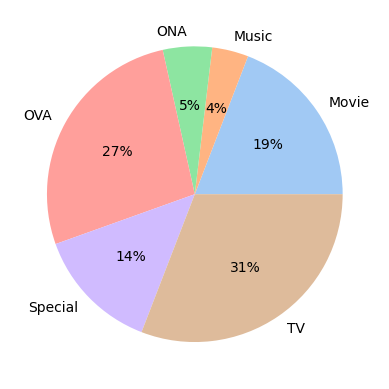

In [55]:
data = sAn[["type"]].value_counts(sort=False)
labels = sAn.type.dropna().sort_values().unique()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[ 0:6 ]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

На диаграмме представлено соотношение количества типов аниме, просмотренных зрителями.